In [1]:
from qiskit import QuantumCircuit, QuantumRegister, execute, Aer 
import math, random

qasm_sim = Aer.get_backend('qasm_simulator')

In [2]:
test_vector = [1,2,3,4,4,3,2,1]

In [3]:
def quantum_value(ctrl, value, name):
    
    # make a circuit 
    circ = QuantumCircuit(len(value), name = name)
    
    # reverse as the least significant bit is the 
    # last one here 
    value = value[::-1]
    
    # encode the value 
    for i in range(len(value)):
        if value[i] == '1':
            circ.x(i)
            
    circ = circ.control(num_ctrl_qubits = len(ctrl), ctrl_state = ctrl)
    
    return circ

In [4]:
def qc_vector(input_vector):
    n = len(input_vector)
    m = max(input_vector)
    
    size_index = math.ceil(math.log2(n))
    size_value = math.floor(math.log2(m)) + 1
    
    index_register = QuantumRegister(size = size_index, name = "indices")
    value_register = QuantumRegister(size = size_value, name = "values")
    
    qcirc = QuantumCircuit(index_register, value_register)
    qcirc.h(index_register)
    # start encoding of the bits 
    for i in range(n):
        # get the ctrl state 
        
        ctrl_state = bin(i)[2:].zfill(size_index)
        
        value = bin(input_vector[i])[2:].zfill(size_value)
        
        qcirc = qcirc.compose(quantum_value(ctrl_state, value, f'arr_{i}'))
    
    
    return qcirc #return quantum circuit

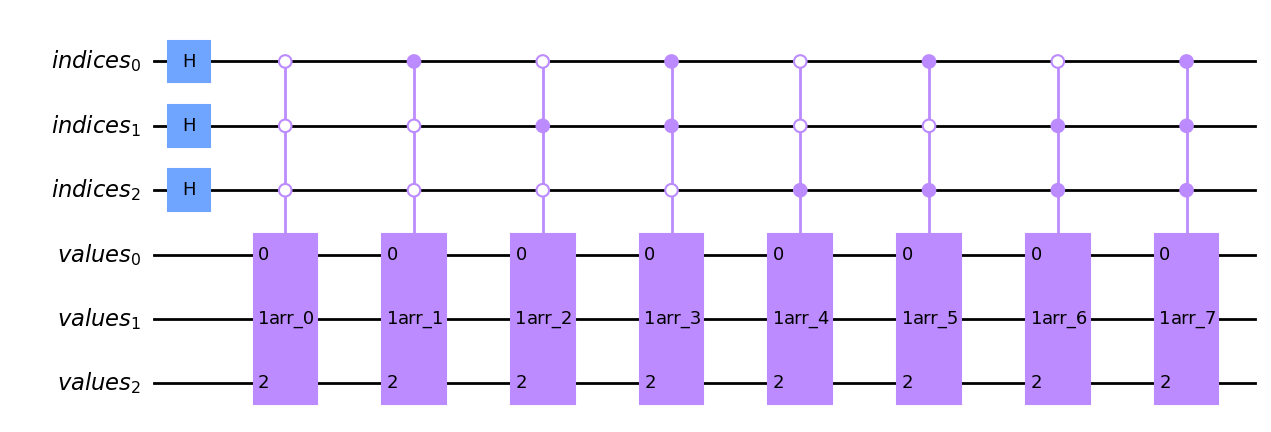

In [5]:
qram = qc_vector(test_vector)
qram.draw('mpl')

In [6]:
def qc_vector_reverse(input_vector):
    return qc_vector(input_vector[::-1]).reverse_ops()#return quantum circuit 

In [7]:
reverse_qram = qc_vector_reverse(test_vector)

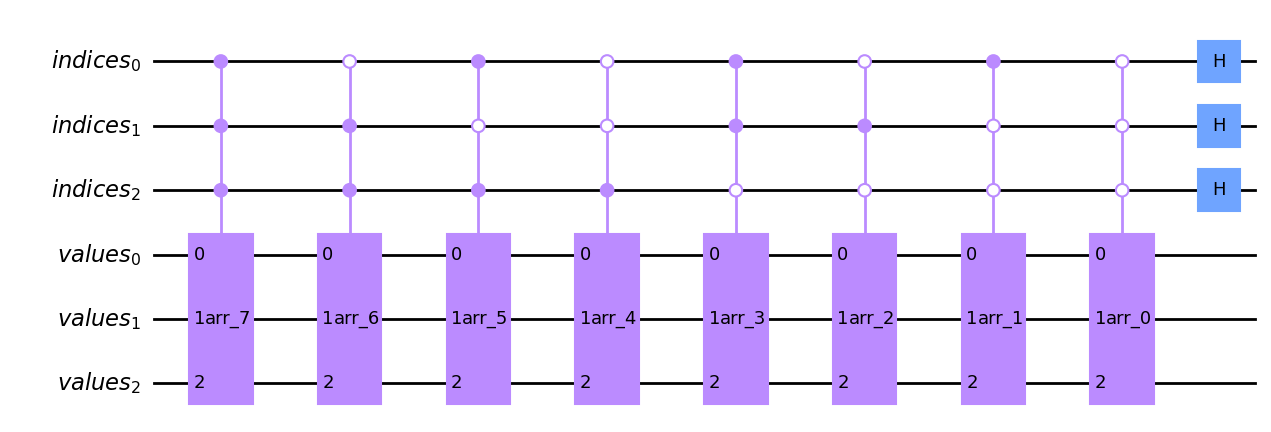

In [8]:
reverse_qram.draw('mpl')

In [9]:
"""
Method to generate an oracle for a quantum circuit, 
using m+1 qubits, and return a 0 or 1 that neabs different or equals. 

qubit_num: Integer value that representate the values qubits for the qram and 1 extra qubit,
           that is the flag qubit. 

return: a quantum circuit that has a set of qubit values + 1 with the flag qubit. 
"""

def quantum_oracle(qubit_number, qram, qram_rev):
    
    qc = QuantumCircuit(qubit_number, name = 'oracle')
    
    # make the oracle 
    qc.compose(qram, inplace = True)
    qc.barrier()
    qc.compose(qram_rev, inplace = True)
    
    
    return qc #return quantum circuit 

In [10]:
def quantum_isPalindrome(input_value):
    
    input_vector = [int(x) for x in str(input_value)]
    
    # make QR
    qram = qc_vector(input_vector)
    
    # make QR_rev dagger
    reverse_qram = qc_vector_reverse(input_vector)
    
    # define K 
    K = qram.num_qubits 
    
    final_circuit = QuantumCircuit(K + 1,1)
    
    # build oracle 
    oracle = quantum_oracle(K, qram, reverse_qram)
    
    # add oracle
    final_circuit.compose(oracle, inplace = True )
    
    # build and add the mcx gate 
    x_gate = QuantumCircuit(1, name = 'x')
    x_gate.x(0)
    zero_mcx_gate = x_gate.control(num_ctrl_qubits=K, ctrl_state = 0)
    
    # compose the gate
    final_circuit.compose(zero_mcx_gate, inplace = True)
    
    # measurement of flag qubit 
    final_circuit.measure(K,0)
    
    results = execute(final_circuit, backend = qasm_sim, shots = 2**12).result().get_counts()
    
    # all the counts were 1, means all zero state on the first
    # k qubits 
    if '0' not in results.keys():
        return 1 
    else:
        return 0

In [11]:
quantum_isPalindrome(312580805213)

0

In [12]:
quantum_isPalindrome(126776212)

0

In [13]:
input_vector = [int(x) for x in str(1)]

# make QR
qram = qc_vector(input_vector)

# make QR_rev dagger
reverse_qram = qc_vector_reverse(input_vector)

CircuitError: 'One or more of the arguments are empty'

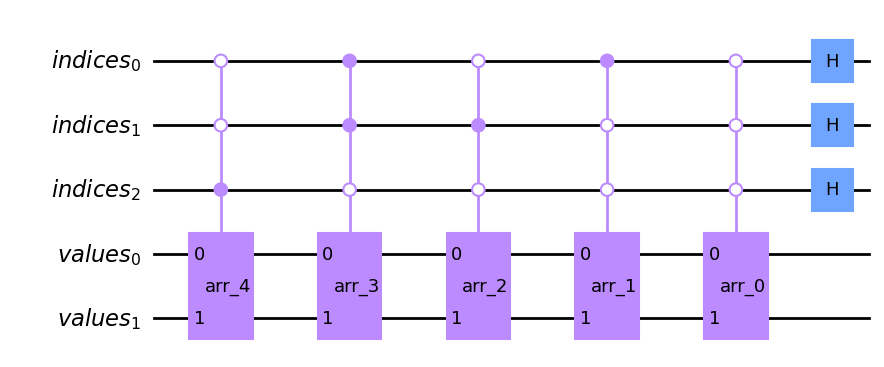

In [14]:
reverse_qram.draw('mpl')

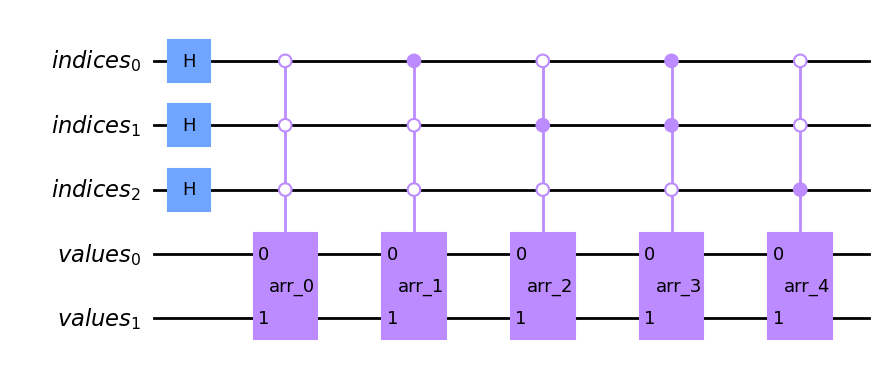

In [15]:
qram.draw('mpl')

In [16]:
# define K 
K = qram.num_qubits 
print(K)

5


In [17]:
final_circuit = QuantumCircuit(K + 1,1)

# build oracle 
oracle = quantum_oracle(K, qram, reverse_qram)

# add oracle
final_circuit.compose(oracle, inplace = True )

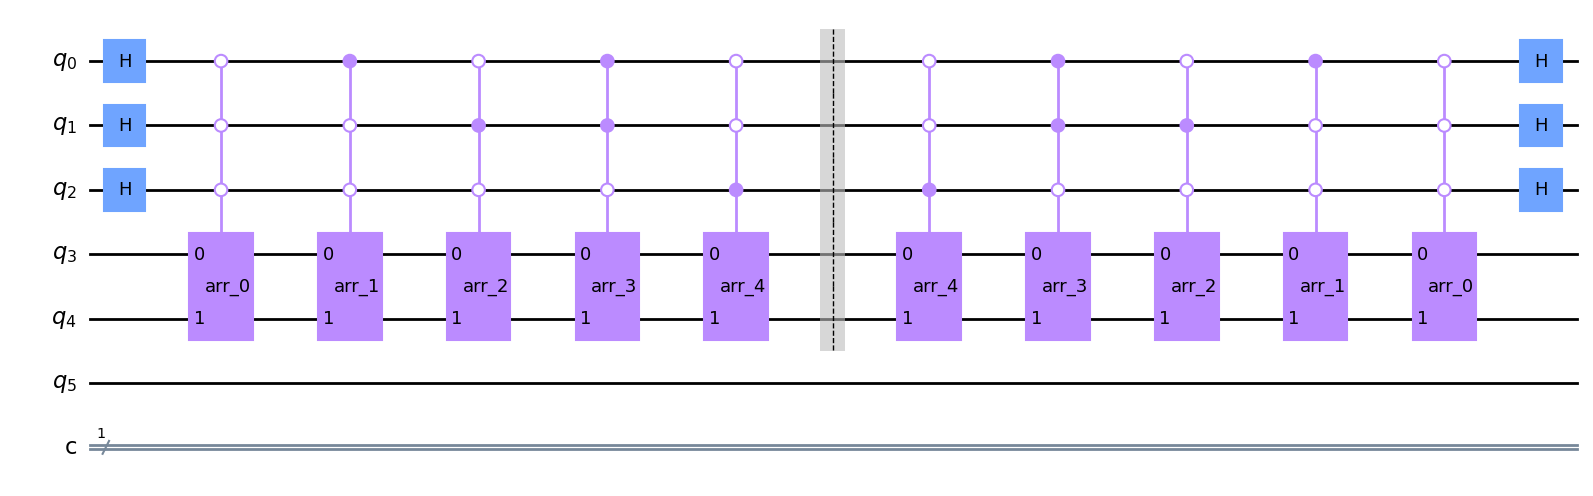

In [18]:
final_circuit.draw('mpl')

In [19]:
# build and add the mcx gate 
x_gate = QuantumCircuit(1, name = 'x')
x_gate.x(0)
zero_mcx_gate = x_gate.control(num_ctrl_qubits=K, ctrl_state = 0)


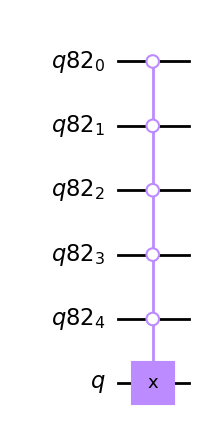

In [20]:
zero_mcx_gate.draw('mpl')

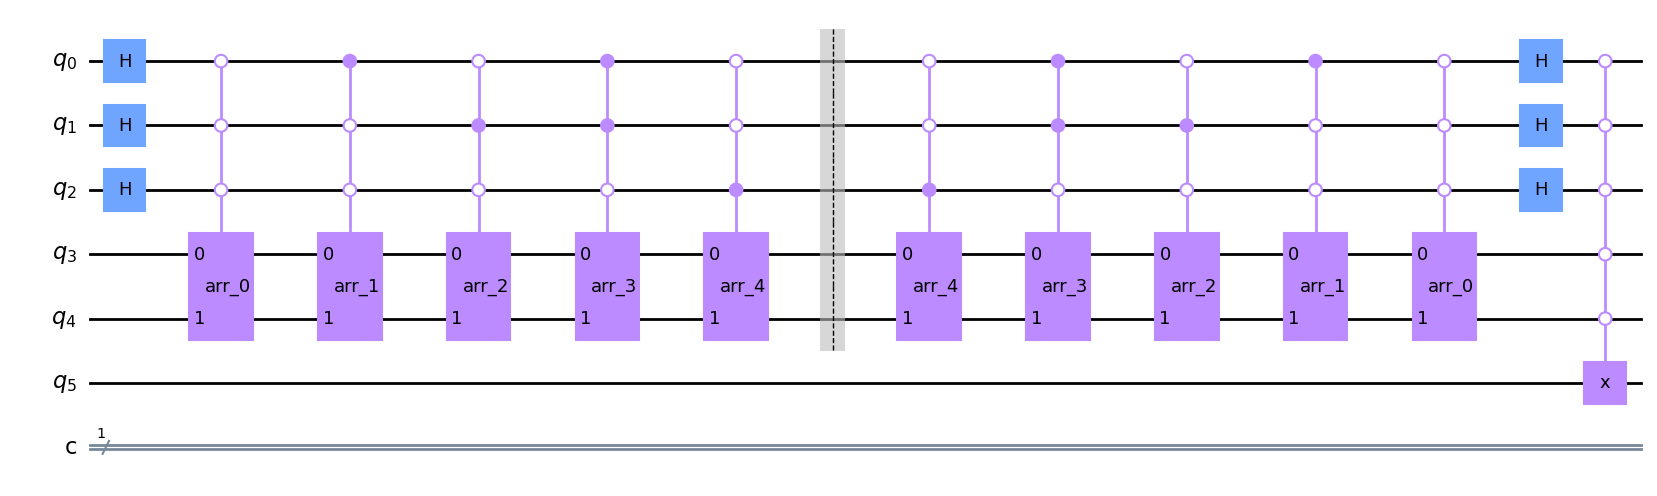

In [21]:
# compose the gate
final_circuit.compose(zero_mcx_gate, inplace = True)
final_circuit.draw('mpl')

In [22]:
# measurement of flag qubit 
final_circuit.measure(K,0)

In [24]:
results = execute(final_circuit, backend = qasm_sim, shots = 2**12).result().get_counts()

# all the counts were 1, means all zero state on the first
# k qubits 
results.keys()

dict_keys(['1'])